## 1. Download Dataset

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

features, target = load_wine(return_X_y=True)

In [28]:
features=pd.DataFrame(features)
target=pd.DataFrame(target)
l_wine=pd.concat([features, target],axis=1)
l_wine.columns=['feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9','feature_10','feature_11','feature_12','feature_13','target']
l_wine.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [29]:
l_wine['target'].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [33]:
list(features.columns)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=8)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(133, 13) (45, 13) (133, 1) (45, 1)


## 2. Prediction With KNN Classifier


In [5]:
from sklearn.neighbors import KNeighborsClassifier

weights='distance'
algorithm='ball_tree'
n_neighbors=10

clf = KNeighborsClassifier(weights=weights,algorithm=algorithm,n_neighbors=n_neighbors, p=1)
clf.fit(x_train, y_train)

C:\Users\User\Anaconda3\envs\anirban\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=1,
                     weights='distance')

In [6]:
from sklearn.model_selection import cross_validate

# cross validate KNN Classifier
scores_clf = cross_validate(clf, x_train, y_train, cv=8, return_train_score=True,return_estimator=False)
scores_clf = pd.DataFrame(scores_clf)
scores_clf

C:\Users\User\Anaconda3\envs\anirban\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\envs\anirban\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\envs\anirban\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\envs\anirban\lib\site-packages\sklearn\model_selection\_validation.

,fit_time,score_time,test_score,train_score
0,0.000000,0.000000,0.888889,1.0
1,0.000000,0.015622,0.764706,1.0
2,0.000000,0.000000,0.764706,1.0
3,0.015626,0.000000,0.705882,1.0
4,0.015618,0.000000,0.882353,1.0
5,0.000000,0.000000,0.812500,1.0
6,0.015620,0.000000,0.812500,1.0
7,0.005008,0.000000,0.800000,1.0


In [7]:
print('Mean Test Score of KNN Classifier: ', scores_clf ['test_score'].mean())
print('Mean Train Score of KNN Classifier: ', scores_clf ['train_score'].mean())

Mean Test Score of KNN Classifier:  0.8039419934640524
Mean Train Score of KNN Classifier:  1.0


In [8]:
y_pred_clf = clf.predict(x_test)
y_pred_clf

array([0, 2, 1, 0, 1, 1, 2, 0, 1, 1, 1, 0, 1, 0, 1, 2, 1, 2, 0, 1, 1, 1,
       0, 1, 2, 0, 0, 1, 0, 1, 2, 2, 0, 1, 1, 2, 0, 0, 2, 2, 0, 1, 2, 2,
       2])

[Text(33.0, 0.5, 'Truth'), Text(0.5, 15.0, 'SVM_Prediction')]

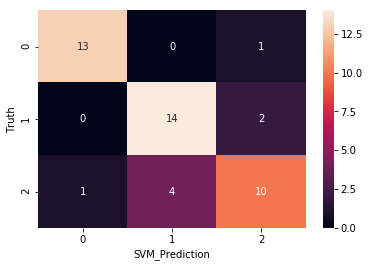

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, accuracy_score, average_precision_score, f1_score
import seaborn as sns

ax = sns.heatmap(confusion_matrix(y_test, y_pred_clf), annot=True, fmt='d')
ax.set(xlabel='SVM_Prediction', ylabel='Truth')

In [10]:
print(classification_report(y_test, y_pred_clf))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.78      0.88      0.82        16
           2       0.77      0.67      0.71        15

    accuracy                           0.82        45
   macro avg       0.83      0.82      0.82        45
weighted avg       0.82      0.82      0.82        45



In [11]:
accuracy_score(y_pred_clf, y_test)

0.8222222222222222